# Validation: Minimum Number Active Cases

This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Tests the effect of different minimum numbers of active cases on cm effectiveness

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl

sns.set_style("ticks")
%matplotlib inline

In [34]:
dp = DataPreprocessor(drop_HS=True)

### Specify models to run

In [36]:
model_types = ['combined_v3']
min_conf_cases = [10, 30, 300, 500]

## Build and run models

In [37]:
for model_type in model_types:
    for i in range(len(min_conf_cases)):
        print('Model: ' + str(model_type))
        print('Minimum number of confirmed cases: ' + str(min_conf_cases[i]))
        dp.min_confirmed = min_conf_cases[i]
        data = dp.preprocess_data("../final_data/data_final.csv")

        if model_type=='active':
            with cm_effect.models.CMActive_Final(data) as model:
                    model.build_model()
        if model_type=='combined':
            with cm_effect.models.CMCombined_Final(data) as model:
                    model.build_model()
        if model_type=='death':
            with cm_effect.models.CMDeath_Final(data) as model:
                    model.build_model()
        if model_type=='combined_v3':
            with cm_effect.models.CMCombined_Final_V3(data) as model:
                    model.build_model()
        #model.run(1000, chains=8, cores=8)
        #cm_trace = model.trace["CMReduction"]
        filename = 'out_final/min_confirmed_'+ str(model_type) + '_' + str(min_conf_cases[i]) + '.txt'
        #np.savetxt(filename, cm_trace)

Model: combined_v3
Minimum number of confirmed cases: 10


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking
INFO:epimodel.pymc3_mod

out_final/min_confirmed_combined_v3_10.txt
Model: combined_v3
Minimum number of confirmed cases: 30


INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control


out_final/min_confirmed_combined_v3_30.txt
Model: combined_v3
Minimum number of confirmed cases: 300


KeyboardInterrupt: 

### Plot traces 

In [ ]:
for model in models:
    model.plot_traces()

### Plot countermeasure effectiveness

In [20]:
legend_title = 'Min Cases'
legend_labels = ['100 (default)','500']
cm_labels = data.CMs 

#### plot active model

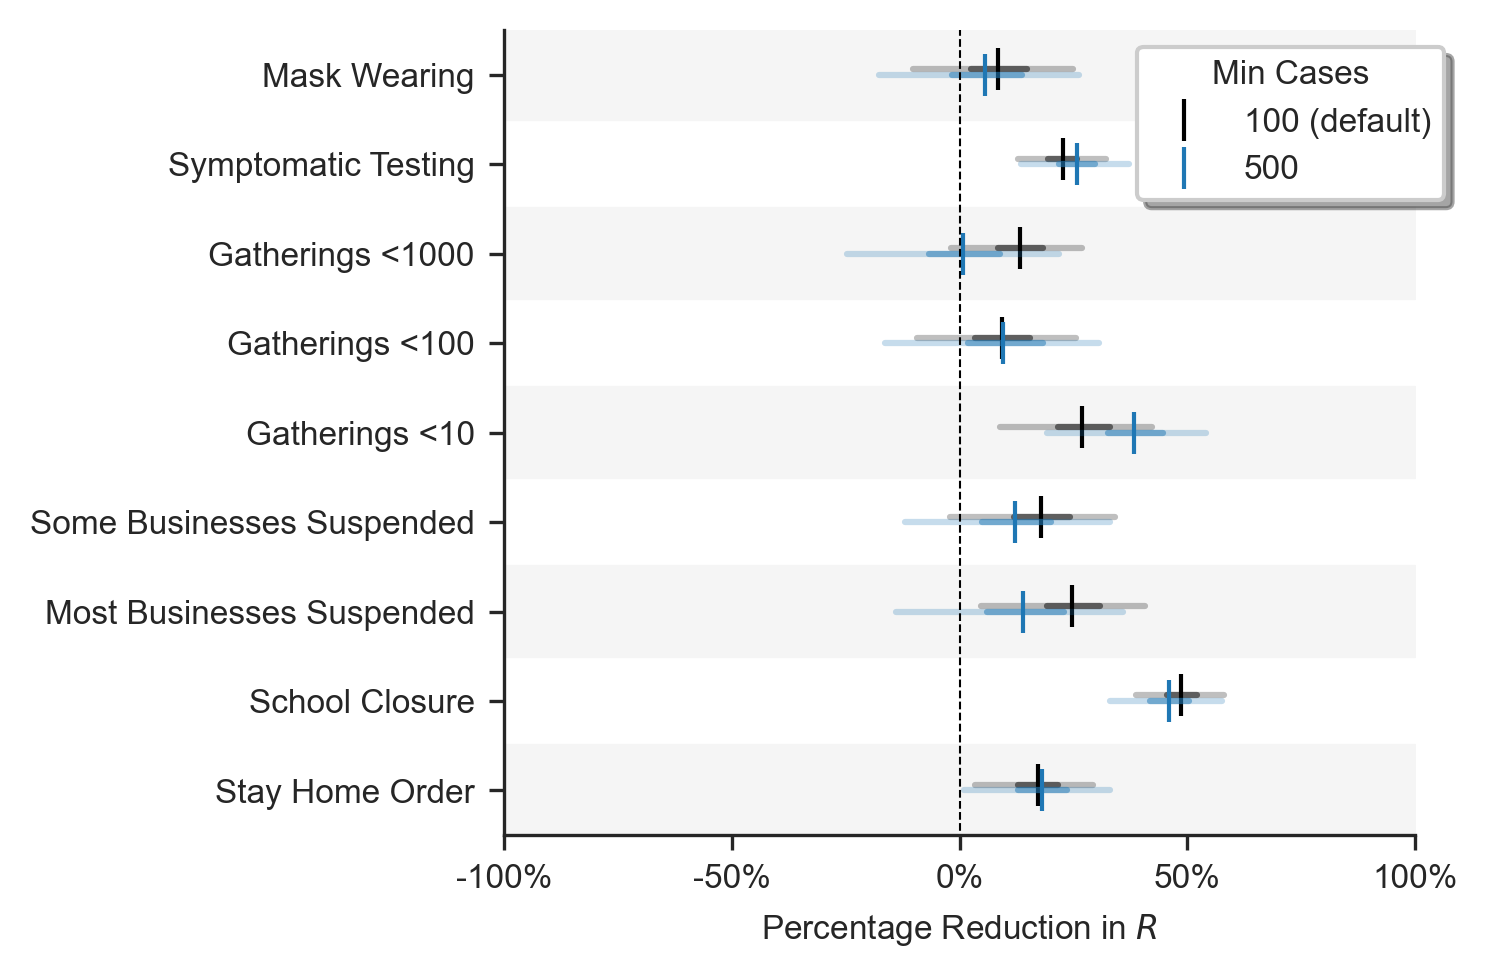

In [23]:
filenames = ['out_final/default_active.txt', 'out_final/min_confirmed_active_500.txt']
colors = ['black','tab:blue']

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors = colors,
                               bbox_to_anchor=(1.05,1))
plt.savefig('out_final/min_confirmed_active_sensitivity.pdf')

##### plot combined

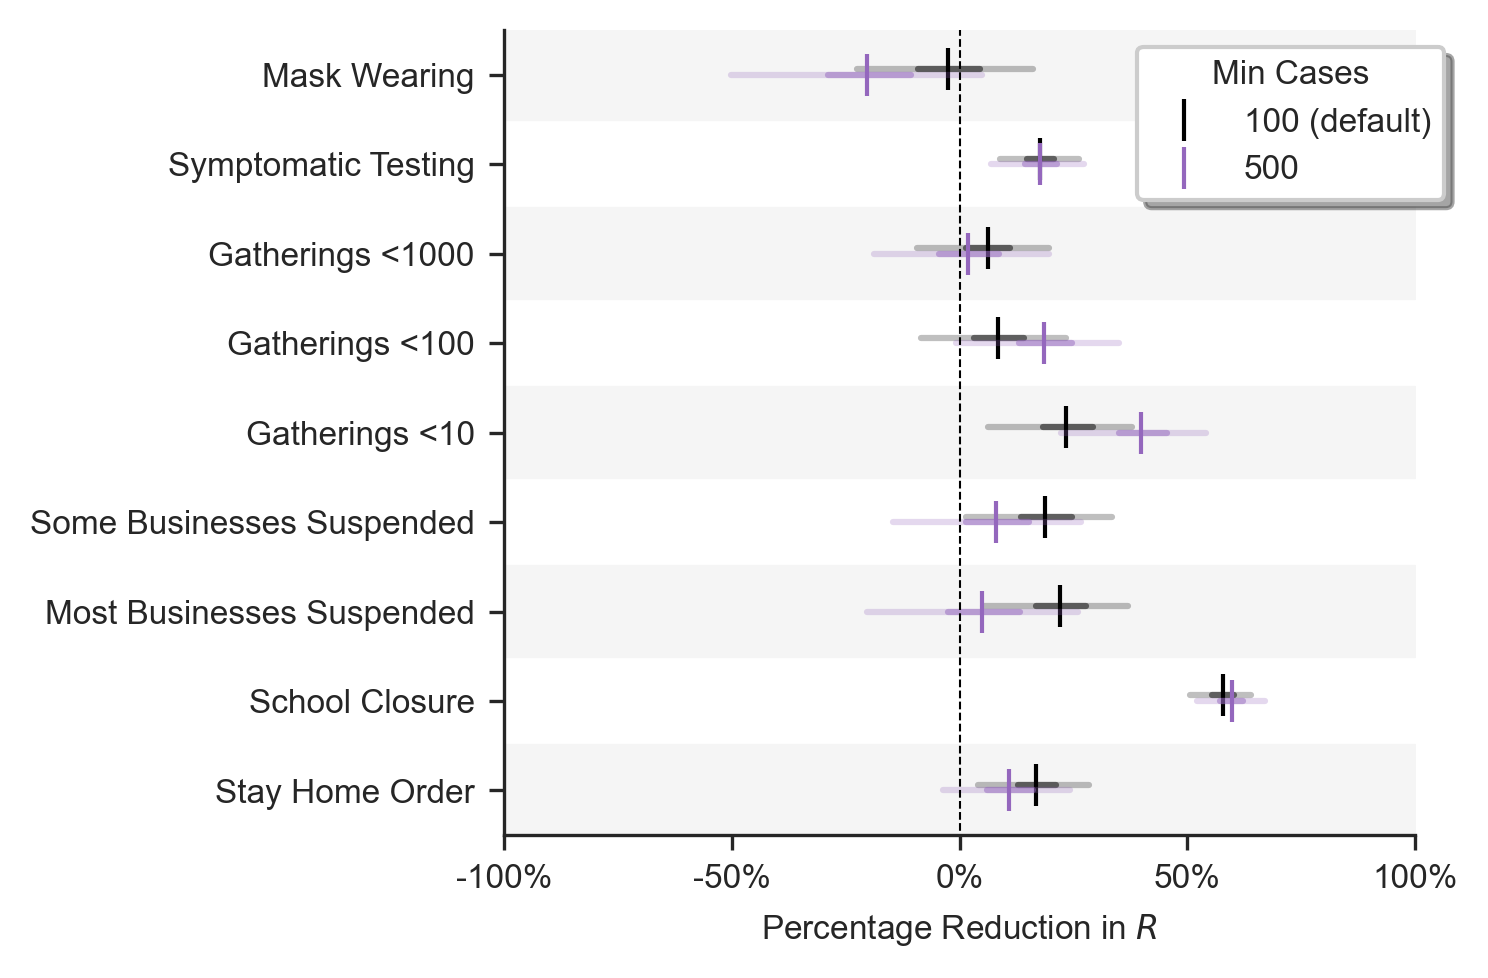

In [24]:
filenames = ['out_final/default_combined.txt', 'out_final/min_confirmed_combined_500.txt']
colors = colors = ['black','tab:purple']

spl.plot_cm_effect_sensitivity(filenames, cm_labels, legend_labels,
                               legend_title=legend_title,
                               colors = colors,
                               bbox_to_anchor=(1.05,1))
plt.savefig('out_final/min_confirmed_combined_sensitivity.pdf')